---
<h1 style="text-align: center;">Fourier Transformation for Image Processing</h1>

*Student:*

    *   Gabriel D'assumpção de Carvalho


---

# Libraries

In [1]:
# Manipulating data
import torch
import numpy as np
from PIL import Image

# Graphics
import matplotlib.pyplot as plt
import seaborn_image as isns
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function 

In [2]:
def ft2d(image):
    """
    Computes the 2D Fourier Transform of an image using the definition of the Fourier Transform.
    Args:
        image (torch.Tensor): Input image tensor of shape (L, C) where L is the number of rows and C is the number of columns.
    Returns:
        torch.Tensor: 2D Fourier Transform of the input image tensor.
    """
    L = image.shape[0]
    C = image.shape[1]
    F = torch.zeros_like(image, dtype=torch.complex64)

    for c in range(C):
        for l in range(L):
            spectrum = 0 + 0j
            for n1 in range(C):
                for n2 in range(L):
                    angle = -2 * np.pi * (l * n1 / L + c * n2 / C)
                    spectrum += image[n1, n2] * torch.exp(
                        torch.tensor(angle * 1j, dtype=torch.complex64)
                    )
            F[l, c] = spectrum
    return F


def ift2d(F):
    """
    Computes the 2D Inverse Fourier Transform of a frequency domain representation.
    Args:
        F (torch.Tensor): Input frequency domain tensor of shape (L, C) where L is the number of rows and C is the number of columns.
    Returns:
        torch.Tensor: 2D Inverse Fourier Transform of the input frequency domain tensor.
    """
    L = F.shape[0]
    C = F.shape[1]
    image = torch.zeros_like(F, dtype=torch.complex64)
    for n1 in range(L):
        for n2 in range(C):
            spectrum = 0 + 0j
            for l in range(L):
                for c in range(C):
                    angle = 2 * np.pi * (l * n1 / L + c * n2 / C)
                    spectrum += F[l, c] * torch.exp(
                        torch.tensor(angle * 1j, dtype=torch.complex64)
                    )
            image[n1, n2] = spectrum / (L * C)
    return image

def ftshift(F):
    L = F.shape[0]
    C = F.shape[1]
    
    return F.roll(shifts=(L // 2, C // 2), dims=(0, 1))

def mse(image1, image2):
    """
    Computes the Mean Squared Error (MSE) between two images.
    Args:
        image1 (torch.Tensor): First image tensor.
        image2 (torch.Tensor): Second image tensor.
    Returns:
        float: Mean Squared Error between the two images.
    """
    return np.abs(torch.mean((image1 - image2) ** 2).item())

# Aplies Fourier Transform to a given image tensor.

## Random Gamma Tensor

In [3]:
N = 30
shape = 2
rate = 2
torch.manual_seed(1)

gammaTensor = torch.distributions.Gamma(shape, rate).sample((N, N))

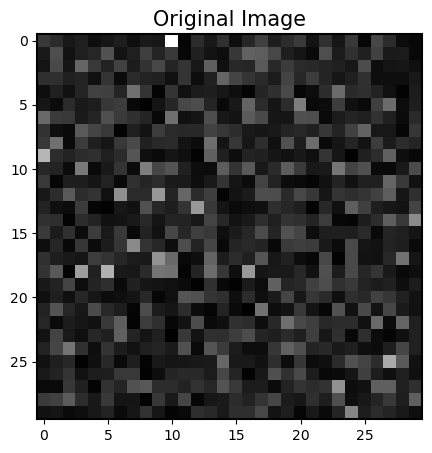

In [4]:
plt.figure(figsize=(5, 5))
plt.imshow(gammaTensor.numpy(), cmap="gray")
plt.title('Original Image')
plt.show()

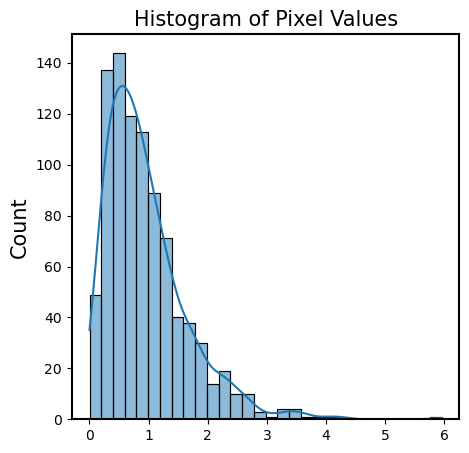

In [5]:
plt.figure(figsize=(5, 5))
sns.histplot(gammaTensor.numpy().flatten(), bins=30, kde=True)
plt.title('Histogram of Pixel Values')
plt.show()

In [6]:
## Fourier Transform
F = ft2d(gammaTensor)

In [8]:
F

tensor([[ 8.5844e+02+0.0000e+00j, -1.2346e+01+3.6155e+00j,
         -6.3604e+00+1.8747e+00j,  2.5411e+00+6.9683e+00j,
         -1.4402e+01-1.0271e+01j,  9.3682e+00-1.4996e+01j,
          4.1045e+00+4.0012e+00j,  6.6575e+00-1.9653e+01j,
         -1.6478e+01-2.1483e+01j,  4.0879e+01+1.0198e+01j,
         -6.3910e+00-5.2911e+00j,  2.6141e+01+7.3307e+00j,
          8.2102e+00-6.1195e+00j, -1.1507e+01-6.4268e+00j,
         -7.8659e+00-4.8407e+00j, -2.4803e+01-1.7893e-04j,
         -7.8655e+00+4.8403e+00j, -1.1507e+01+6.4267e+00j,
          8.2102e+00+6.1195e+00j,  2.6141e+01-7.3307e+00j,
         -6.3911e+00+5.2911e+00j,  4.0879e+01-1.0199e+01j,
         -1.6478e+01+2.1483e+01j,  6.6575e+00+1.9653e+01j,
          4.1045e+00-4.0016e+00j,  9.3678e+00+1.4996e+01j,
         -1.4402e+01+1.0271e+01j,  2.5410e+00-6.9685e+00j,
         -6.3605e+00-1.8751e+00j, -1.2346e+01-3.6155e+00j],
        [-1.2252e+01-1.5108e+01j, -2.1017e+01+1.1361e+01j,
          2.3959e+00-1.0901e+01j, -1.2759e+01-6.6827e+0

In [7]:
sAbs = {
    "min": torch.abs(F).min().item(),
    "max": torch.abs(F).max().item(),
    "mean": torch.abs(F).mean().item(),
    "std": torch.abs(F).std().item(),
    "median": torch.median(torch.abs(F)).item(),
}
print(f"Summary of absolute values of Fourier Transform:")
print(f"  Min: {sAbs['min']:.2f}, Max: {sAbs['max']:.2f}")
print(f"  Mean: {sAbs['mean']:.2f}, Std: {sAbs['std']:.2f}")
print(f"  Median: {sAbs['median']:.2f}")

sReal = {
    "min": torch.real(F).min().item(),
    "max": torch.real(F).max().item(),
    "mean": torch.real(F).mean().item(),
    "std": torch.real(F).std().item(),
    "median": torch.median(torch.real(F)).item(),
}
print(f"Summary of real part of Fourier Transform:")
print(f"  Min: {sReal['min']:.2f}, Max: {sReal['max']:.2f}")
print(f"  Mean: {sReal['mean']:.2f}, Std: {sReal['std']:.2f}")
print(f"  Median: {sReal['median']:.2f}")

sImag = {
    "min": torch.imag(F).min().item(),
    "max": torch.imag(F).max().item(),
    "mean": torch.imag(F).mean().item(),
    "std": torch.imag(F).std().item(),
    "median": torch.median(torch.imag(F)).item(),
}
print(f"Summary of imaginary part of Fourier Transform:")
print(f"  Min: {sImag['min']:.2f}, Max: {sImag['max']:.2f}")
print(f"  Mean: {sImag['mean']:.2f}, Std: {sImag['std']:.2f}")
print(f"  Median: {sImag['median']:.2f}")

sAngle = {
    "min": torch.angle(F).min().item(),
    "max": torch.angle(F).max().item(),
    "mean": torch.angle(F).mean().item(),
    "std": torch.angle(F).std().item(),
    "median": torch.median(torch.angle(F)).item(),
}
print(f"Summary of angles of Fourier Transform:")
print(f"  Min: {sAngle['min']:.2f}, Max: {sAngle['max']:.2f}")
print(f"  Mean: {sAngle['mean']:.2f}, Std: {sAngle['std']:.2f}")
print(f"  Median: {sAngle['median']:.2f}")

Summary of absolute values of Fourier Transform:
  Min: 0.59, Max: 858.44
  Mean: 19.35, Std: 29.60
  Median: 17.13
Summary of real part of Fourier Transform:
  Min: -47.40, Max: 858.44
  Mean: 1.34, Std: 32.33
  Median: -0.41
Summary of imaginary part of Fourier Transform:
  Min: -45.92, Max: 45.92
  Mean: 0.00, Std: 14.29
  Median: -0.00
Summary of angles of Fourier Transform:
  Min: -3.14, Max: 3.12
  Mean: -0.01, Std: 1.82
  Median: -0.01


In [12]:
FTwo = ftshift(F)

f23 = torch.zeros_like(FTwo, dtype=torch.complex64)
f = ift2d(FTwo * 0 + FTwo[0][0])

f23[2][3] = FTwo[2][3]

f23 = ift2d(f23)

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(torch.abs(f).numpy(), cmap="gray")
plt.title("IFT of FTwo[0][0]")

plt.subplot(1, 2, 2)
plt.imshow(torch.abs(f23).numpy(), cmap="gray")
plt.title("IFT of FTwo[2][3]")
plt.show()

KeyboardInterrupt: 

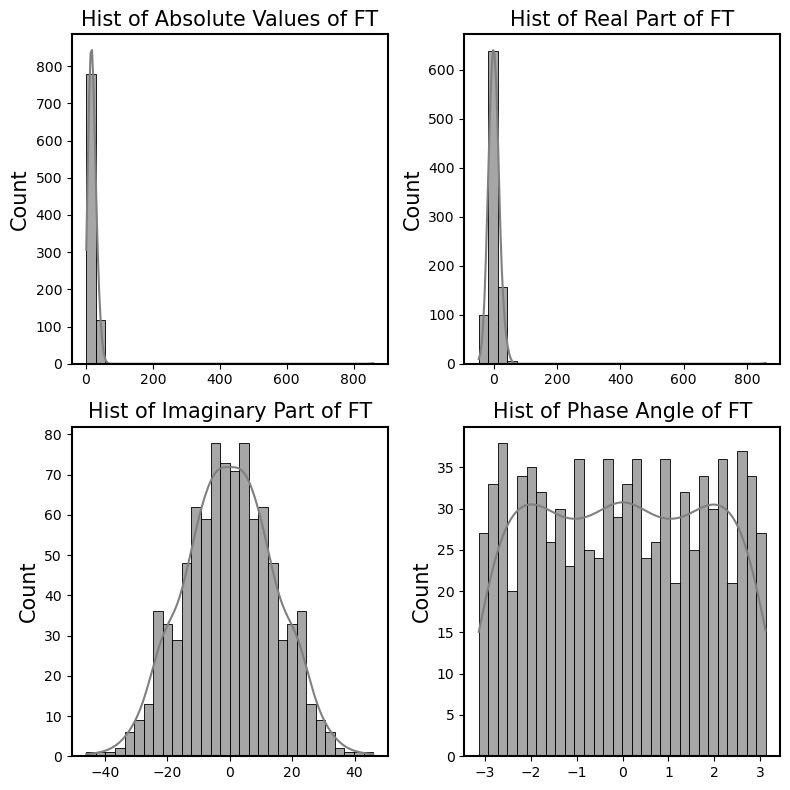

In [13]:
plt.figure(figsize=(8, 8))  

# Top-left: Absolute values
plt.subplot(2, 2, 1)
sns.histplot(torch.abs(F).numpy().flatten(), bins=30, color="gray", alpha=0.7, kde=True)
plt.title('Hist of Absolute Values of FT')

# Top-right: Real part
plt.subplot(2, 2, 2)
sns.histplot(torch.real(F).numpy().flatten(), bins=30, color="gray", alpha=0.7, kde=True)
plt.title('Hist of Real Part of FT')

# Bottom-left: Imaginary part
plt.subplot(2, 2, 3)
sns.histplot(torch.imag(F).numpy().flatten(), bins=30, color='gray', alpha=0.7, kde=True)
plt.title('Hist of Imaginary Part of FT')

# Bottom-right: Phase angle
plt.subplot(2, 2, 4)
sns.histplot(
    torch.angle(F).numpy().flatten(), bins=30, color="gray", alpha=0.7, kde=True
)  # Torch angle equal to np.arctan2(torch.imag(F), torch.real(F)).flatten()
plt.title('Hist of Phase Angle of FT')

plt.tight_layout()
plt.show()

In [14]:
FAbsLog = torch.log(torch.abs(F) + 1e-8)
Fshifted = ftshift(FAbsLog)

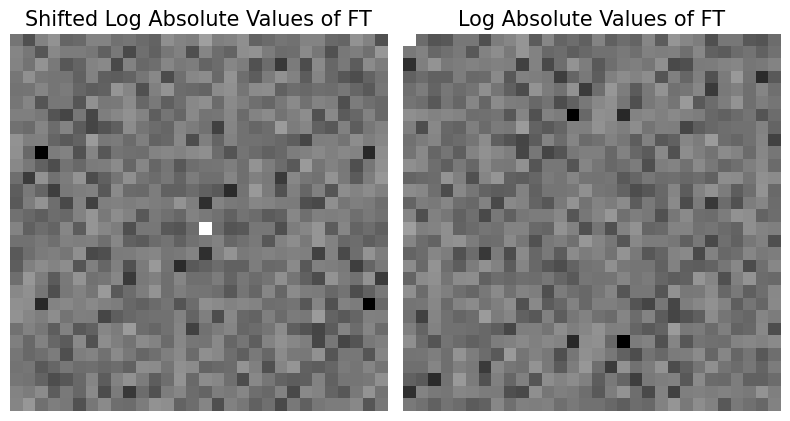

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(Fshifted.numpy(), cmap='gray')
plt.title('Shifted Log Absolute Values of FT')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np.log(torch.abs(F).numpy()), cmap='gray')
plt.title('Log Absolute Values of FT')
plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
imageReconstructed = ift2d(F)

In [13]:
error = mse(image, imageReconstructed)
print(f"Mean Squared Error between original and reconstructed image: {error}")

Mean Squared Error between original and reconstructed image: 1.0165327927779798e-11


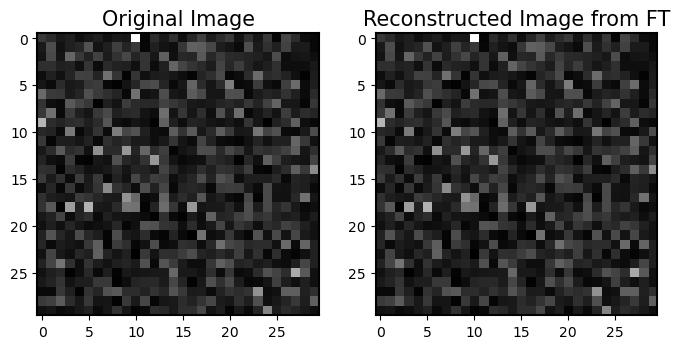

In [14]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image.numpy(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(imageReconstructed.real.numpy(), cmap='gray')
plt.title('Reconstructed Image from FT')
plt.show()

## Cat Image Tensor


In [15]:
imagePath = "/home/gabrieldadcarvalho/github/image_processing/classroom/cat.png"
image = Image.open(imagePath).convert("L")

npImage = np.array(image)
catTensor = torch.tensor(npImage, dtype=torch.float32) / 255.0
catTensor = catTensor.unsqueeze(0).squeeze()  # Add channel dimension

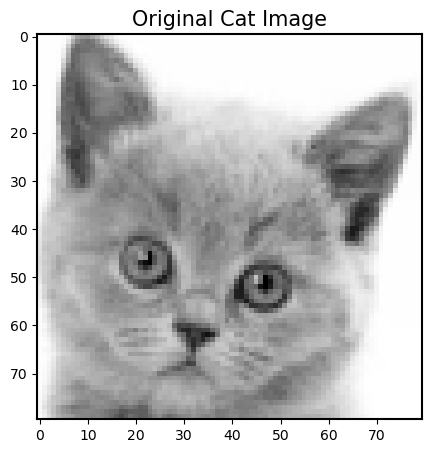

In [16]:
plt.figure(figsize=(5, 5))
plt.imshow(catTensor.numpy(), cmap='gray')
plt.title('Original Cat Image')
plt.show()

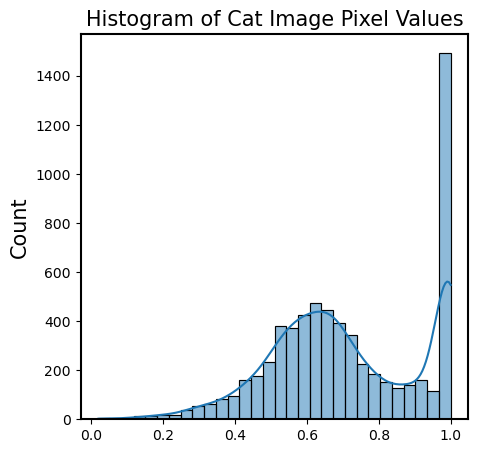

In [17]:
plt.figure(figsize=(5, 5))
sns.histplot(catTensor.numpy().flatten(), bins=30, kde=True)
plt.title('Histogram of Cat Image Pixel Values')
plt.show()

In [67]:
fftCat = ft2d(catTensor)

In [68]:
sAbs = {'min': torch.abs(fftCat).min().item(), 'max': torch.abs(fftCat).max().item(), 'mean': torch.abs(fftCat).mean().item(), 'std': torch.abs(fftCat).std().item(), 'median': torch.median(torch.abs(fftCat)).item()}
print(f"Summary of absolute values of Fourier Transform:")
print(f"  Min: {sAbs['min']:.2f}, Max: {sAbs['max']:.2f}")
print(f"  Mean: {sAbs['mean']:.2f}, Std: {sAbs['std']:.2f}")
print(f"  Median: {sAbs['median']:.2f}")

sReal = {'min': torch.real(fftCat).min().item(), 'max': torch.real(fftCat).max().item(), 'mean': torch.real(fftCat).mean().item(), 'std': torch.real(fftCat).std().item(), 'median': torch.median(torch.real(fftCat)).item()}
print(f"Summary of real part of Fourier Transform:")
print(f"  Min: {sReal['min']:.2f}, Max: {sReal['max']:.2f}")
print(f"  Mean: {sReal['mean']:.2f}, Std: {sReal['std']:.2f}")
print(f"  Median: {sReal['median']:.2f}")

sImag = {'min': torch.imag(fftCat).min().item(), 'max': torch.imag(fftCat).max().item(), 'mean': torch.imag(fftCat).mean().item(), 'std': torch.imag(fftCat).std().item(), 'median': torch.median(torch.imag(fftCat)).item()}
print(f"Summary of imaginary part of Fourier Transform:")
print(f"  Min: {sImag['min']:.2f}, Max: {sImag['max']:.2f}")
print(f"  Mean: {sImag['mean']:.2f}, Std: {sImag['std']:.2f}")
print(f"  Median: {sImag['median']:.2f}")

sAngle = {'min': torch.angle(fftCat).min().item(), 'max': torch.angle(fftCat).max().item(), 'mean': torch.angle(fftCat).mean().item(), 'std': torch.angle(fftCat).std().item(), 'median': torch.median(torch.angle(fftCat)).item()}
print(f"Summary of angles of Fourier Transform:")
print(f"  Min: {sAngle['min']:.2f}, Max: {sAngle['max']:.2f}")
print(f"  Mean: {sAngle['mean']:.2f}, Std: {sAngle['std']:.2f}")
print(f"  Median: {sAngle['median']:.2f}")

Summary of absolute values of Fourier Transform:
  Min: 0.02, Max: 4566.02
  Mean: 5.85, Std: 59.18
  Median: 1.98
Summary of real part of Fourier Transform:
  Min: -123.74, Max: 4566.02
  Mean: 1.00, Std: 58.16
  Median: -0.02
Summary of imaginary part of Fourier Transform:
  Min: -343.70, Max: 343.70
  Mean: 0.00, Std: 12.37
  Median: 0.00
Summary of angles of Fourier Transform:
  Min: -3.14, Max: 3.14
  Mean: 0.00, Std: 1.83
  Median: 0.00


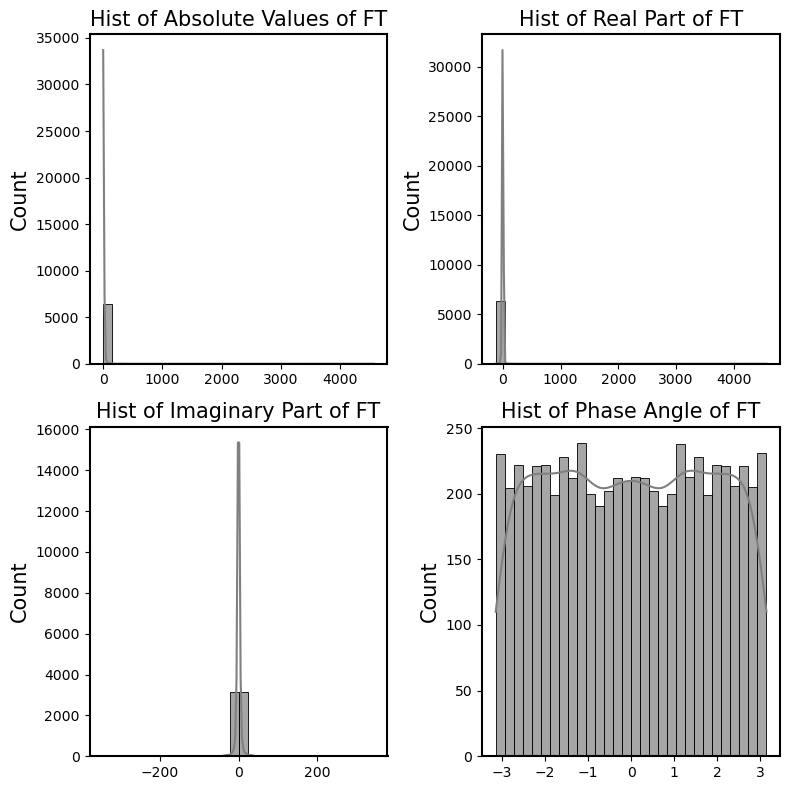

In [69]:
plt.figure(figsize=(8, 8))

# Top-left: Absolute values
plt.subplot(2, 2, 1)
sns.histplot(
    torch.abs(fftCat).numpy().flatten(), bins=30, color="gray", alpha=0.7, kde=True
)
plt.title("Hist of Absolute Values of FT")

# Top-right: Real part
plt.subplot(2, 2, 2)
sns.histplot(
    torch.real(fftCat).numpy().flatten(), bins=30, color="gray", alpha=0.7, kde=True
)
plt.title("Hist of Real Part of FT")

# Bottom-left: Imaginary part
plt.subplot(2, 2, 3)
sns.histplot(
    torch.imag(fftCat).numpy().flatten(), bins=30, color="gray", alpha=0.7, kde=True
)
plt.title("Hist of Imaginary Part of FT")

# Bottom-right: Phase angle
plt.subplot(2, 2, 4)
sns.histplot(
    torch.angle(fftCat).numpy().flatten(), bins=30, color="gray", alpha=0.7, kde=True
)  # Torch angle equal to np.arctan2(torch.imag(F), torch.real(F)).flatten()
plt.title("Hist of Phase Angle of FT")

plt.tight_layout()
plt.show()

In [70]:
catReconstructed = ift2d(fftCat)

In [71]:
error = mse(catTensor, catReconstructed)
print(f"Mean Squared Error between original and reconstructed image: {error}")

Mean Squared Error between original and reconstructed image: 5.711972306473923e-12


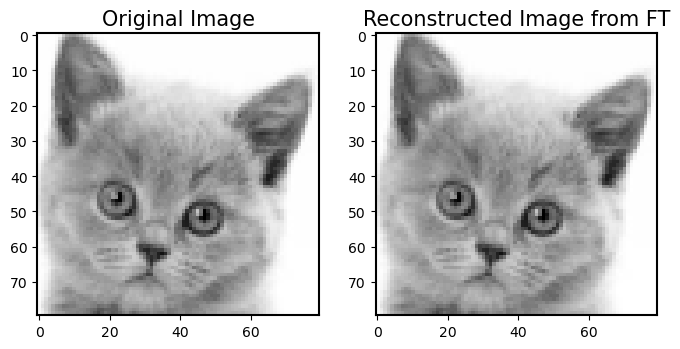

In [72]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(catTensor.numpy(), cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(catReconstructed.real.numpy(), cmap="gray")
plt.title("Reconstructed Image from FT")
plt.show()